# Algebraically small vs Transcendentally small #

## Support material for Perturbation Methods using backward error ##

### by Corless and Fillion ###
#### Forthcoming, SIAM ####

Copyright (c) 2024 Robert M. Corless

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

$\newcommand{\e}{\varepsilon}$
The following plot shows that $\exp(-1/\e)$ is truly transcendentally smaller than any $\e^k$ for integer $k$, as $\e \to 0^+$.  But it's a kind of "gerrymandered" win!  The log plot shows the win, but the plot on the usual scale shows the gerrymandering: for the bulk of the interval $0 < \e < 1$, the exponential is actually _larger_ than $\e^k$ (so, while it "loses the overall popular vote, it wins in the electoral college" so to speak).

        -426.858871010045959 .. -0.441859616435304969]]))

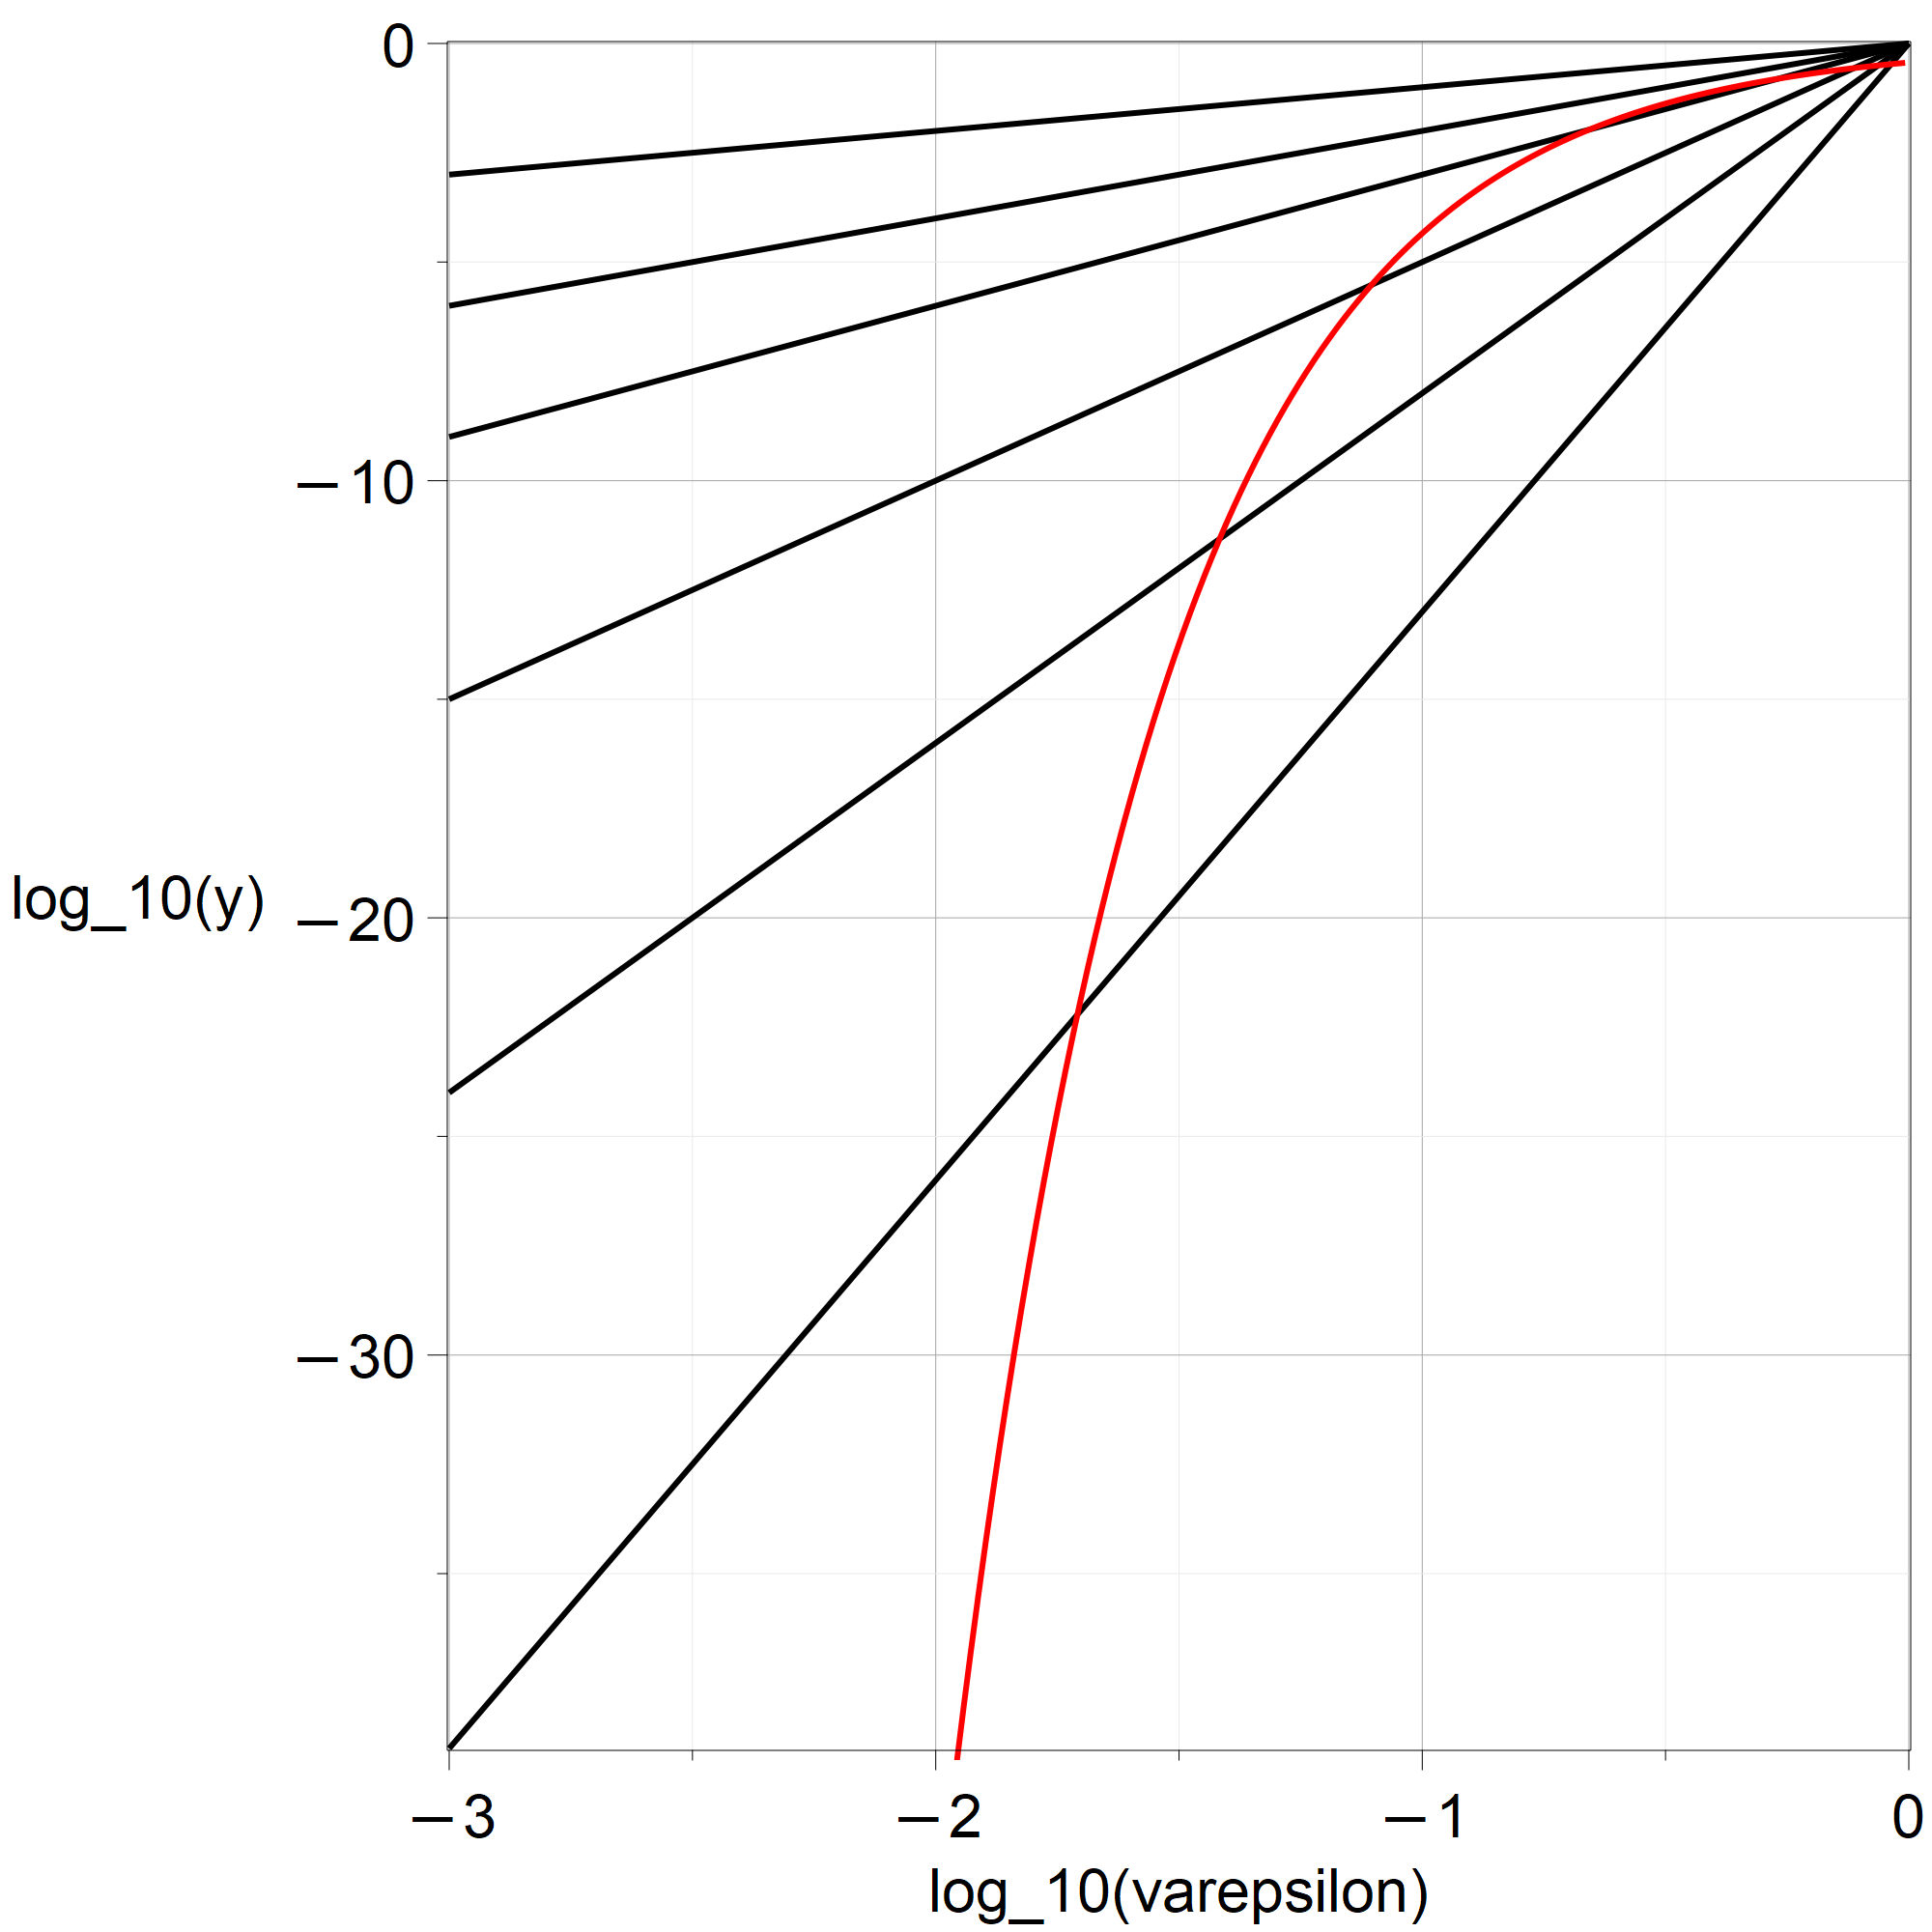

In [1]:
macro( e=varepsilon );
Eleft := -3.0;
algplt := plot( [seq( k*log10eps, k=[1,2,3,5,8,13])], 
                log10eps=Eleft..0, view=[Eleft..0,13*Eleft..0], 
                thickness=6);
transcsmallplt := plot( -log[10](exp(1))/10^(log10eps), 
                 log10eps=Eleft..0, colour=red, thickness=6, 
                 view=[Eleft..0,13*Eleft..0]);
plots[display]( algplt, transcsmallplt, gridlines=true, 
            labels=[typeset( log_10(e) ),log_10(y)], font=["Arial",48], 
            labelfont=["Arial",48],size=[2000,2000]);

        0.671687773800000005 10     .. 0.366959513999999987]]))

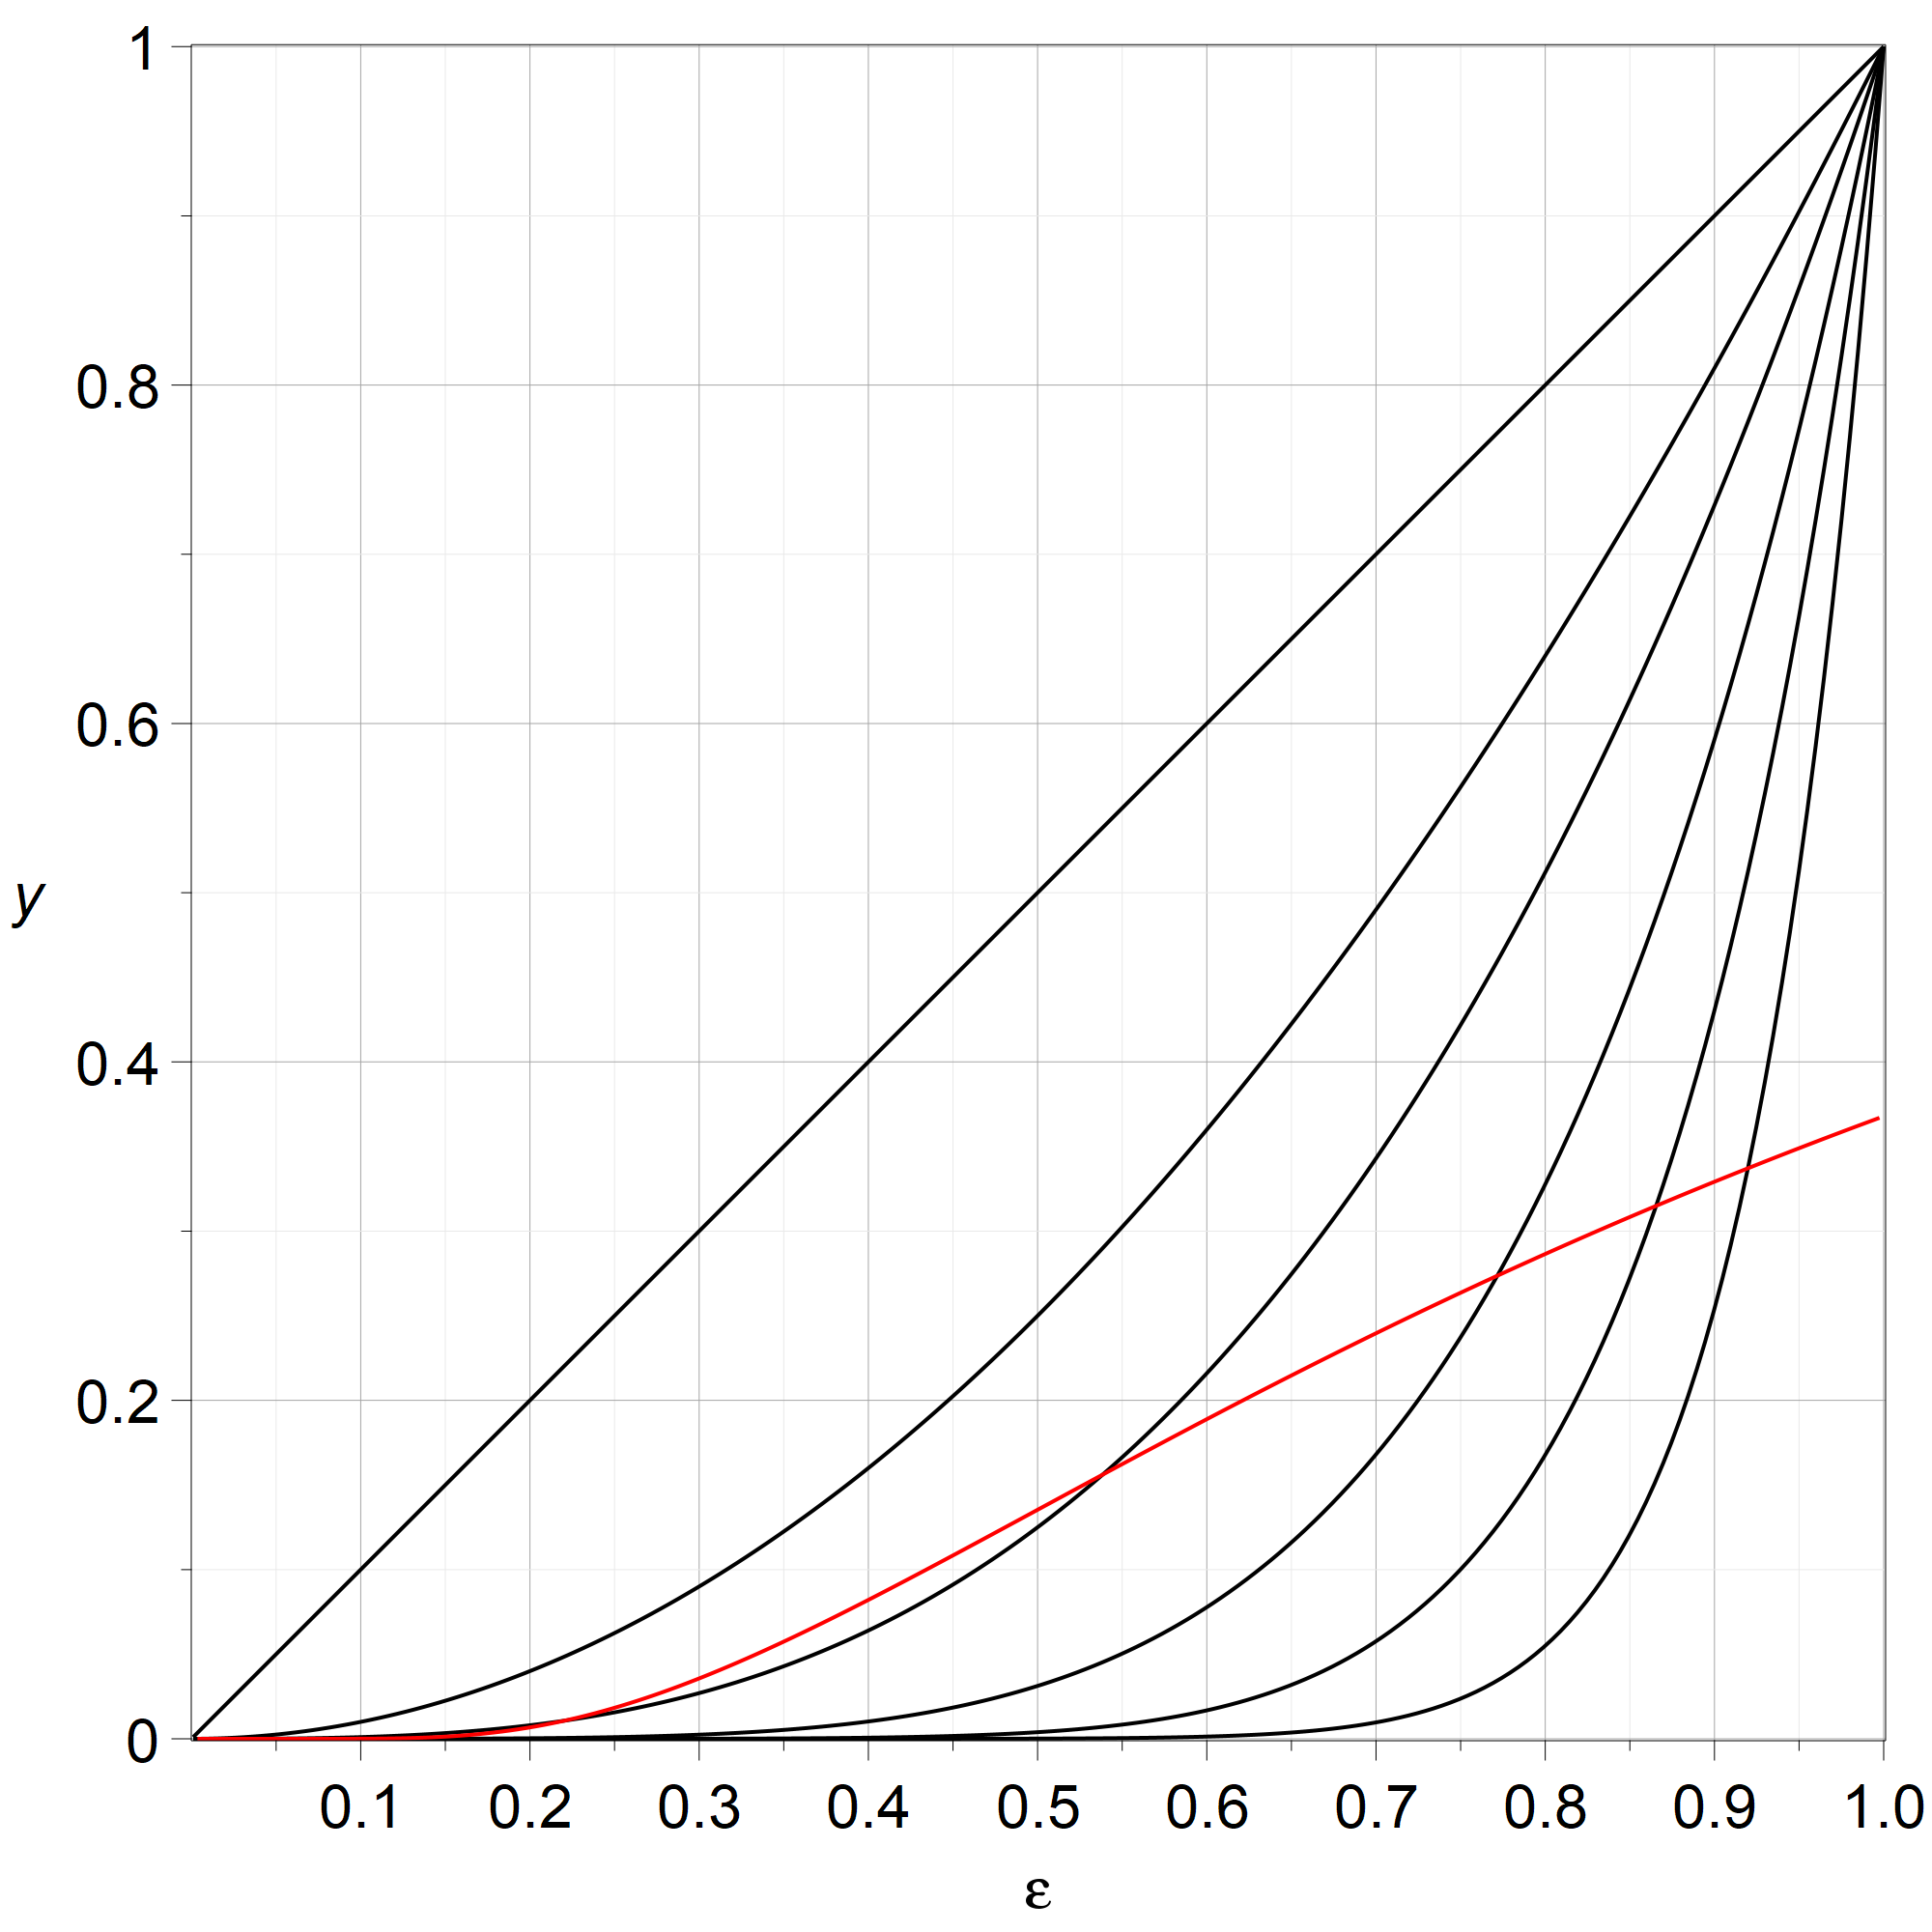

In [2]:
algplt := plot( [seq( e^k, k=[1,2,3,5,8,13])], 
                e=10^Eleft..1, view=[10^Eleft..1,0..1], thickness=4);
transcsmallplt := plot( exp(-1/e), 
                 e=10^Eleft..1, view=[10^Eleft..1,0..1], colour=red, thickness=4);
plots[display]( algplt, transcsmallplt, gridlines=true, 
            labels=[typeset( e ),y ], scaling=constrained, font=["Arial",48], 
            labelfont=["Arial",48],size=[2000,2000]
            );

We see from the second plot that large powers $\e^k$, such as $\e^{13}$, are actually smaller than $\exp(-1/\e)$ over a very large part of the interval.

Solving for the intersections $\e^k = \exp(-1/\e)$ we find that if $k=1$ or $k=2$ there are no intersections, but for $k\ge 3$ (actually for any real $k \ge e$) there are intersectons.  The intersections happen at 

\begin{equation}
\e_0 = e^{W_0(-1/k)}
\end{equation}
and 
\begin{equation}
\e_{-1} = e^{W_{-1}(-1/k)}
\end{equation}
where $W_m(z)$ is the $m$th branch of the Lambert $W$ function.


In [3]:
seq( [exp( LambertW(-1,-1.0/k)), exp(LambertW(0,-1.0/k))], k=[3,5,8,13])

$$[ 0.2204389370,  0.5384496503],[ 0.07865836027,  0.7716909740],[ 0.03832374178,  0.8655229804],[ 0.01954936216,  0.9197686870]$$

In [4]:
seq(exp(LambertW(0,-1.0/k))-exp( LambertW(-1,-1.0/k)),k=[3,5,8,13])

$$ 0.3180107133, 0.6930326137, 0.8271992386, 0.9002193248$$


The part of the interval $0 < \e < 1$ where $\e^k$ is smaller than $\exp(-1/\e)$ is $\e_{-1} < \e < \e_0$, and since $\e_0 \sim 1 - 1/k$ while $\e_{-1} \sim 1/(k\ln k)$, we see that as $k$ increases, the portion of the interval where the algebraic function $\e^k$ is smaller tends to 100\%!

But when $\exp(-1/\e)$ gets small, it gets _really_ small, as we see in the table below.

We tabulate $k \log_{10}\e$ for various $k$ and $\e$, and $\log_{10} e^{-1/e}$ in the separate vector.

In [5]:
ks := [1,2,3,5,8,13,21];
K := numelems(ks);
N := 8;
logseps := [seq(-j/2.0, j=0..N)];
Alg := evalf[3](Matrix(N+1, K, (i,j)-> ks[j]*logseps[i] ));

        -2.500000000, -3.000000000, -3.500000000, -4.000000000]

$$\left[\begin{array}{ccccccc}
- 0.0 & - 0.0 & - 0.0 & - 0.0 & - 0.0 & - 0.0 & - 0.0 
\\
 - 0.500 & - 1.0 & - 1.50 & - 2.50 & - 4.0 & - 6.50 & - 10.5 
\\
 - 1.0 & - 2.0 & - 3.0 & - 5.0 & - 8.0 & - 13.0 & - 21.0 
\\
 - 1.50 & - 3.0 & - 4.50 & - 7.50 & - 12.0 & - 19.5 & - 31.5 
\\
 - 2.0 & - 4.0 & - 6.0 & - 10.0 & - 16.0 & - 26.0 & - 42.0 
\\
 - 2.50 & - 5.0 & - 7.50 & - 12.5 & - 20.0 & - 32.5 & - 52.5 
\\
 - 3.0 & - 6.0 & - 9.0 & - 15.0 & - 24.0 & - 39.0 & - 63.0 
\\
 - 3.50 & - 7.0 & - 10.5 & - 17.5 & - 28.0 & - 45.5 & - 73.5 
\\
 - 4.0 & - 8.0 & - 12.0 & - 20.0 & - 32.0 & - 52.0 & - 84.0 
\end{array}\right]$$

In [6]:
B := evalf[5](Vector(N+1, i->-log[10](exp(1.0))/10^logseps[i]));

$$\left[\begin{array}{c}
- 0.43430 
\\
 - 1.3734 
\\
 - 4.3430 
\\
 - 13.734 
\\
 - 43.430 
\\
 - 137.34 
\\
 - 434.30 
\\
 - 1373.4 
\\
 - 4343.0 
\end{array}\right]$$

In [7]:
Ev := evalf[3](Vector( N+1, i-> 10.^logseps[i]));

$$\left[\begin{array}{c}
 1.0 
\\
  0.316 
\\
  0.100 
\\
  0.0316 
\\
  0.0100 
\\
  0.00316 
\\
  0.00100 
\\
  0.000316 
\\
  0.000100 
\end{array}\right]$$

In [8]:
convert(Ev,list);

$$[ 1.0,  0.316,  0.100,  0.0316,  0.0100,  0.00316,  0.00100,  0.000316,  0.000100]$$

| $\e$ | $\log_{10}\e$ | $\log_{10}\e^2$ | $\log_{10}\e^3$ | $\log_{10}\e^4$ | $\log_{10}\e^5$ |
|-----:| -------------:|-------------:|-------------:|-------------:|-------------:|
| $1.00$ | $0.00$ |  $0.00$ | $0.00$ | $0.00$ |$0.00$ |
| $0.316$ | $-0.5$ | $-1.0$ | $-1.5$ | $-2.0$ |$-2.5$ |
| $0.10$ | $-1.0$ |  $-2.0$ | $-3.0$ | $-4.0$ |$-5.0$ |


In [9]:
AlgData := DataFrame( Alg, columns=[seq( log__10(e^k), k=ks )], rows=Ev);

$$\left[\begin{array}{cccccccc}
  & \mathit{log}_{10} \left(\varepsilon \right) & \mathit{log}_{10} \left(\varepsilon^{2}\right) & \mathit{log}_{10} \left(\varepsilon^{3}\right) & \mathit{log}_{10} \left(\varepsilon^{5}\right) & \mathit{log}_{10} \left(\varepsilon^{8}\right) & \mathit{log}_{10} \left(\varepsilon^{13}\right) & \mathit{log}_{10} \left(\varepsilon^{21}\right) 
\\
  1.0 & - 0.0 & - 0.0 & - 0.0 & - 0.0 & - 0.0 & - 0.0 & - 0.0 
\\
  0.316 & - 0.500 & - 1.0 & - 1.50 & - 2.50 & - 4.0 & - 6.50 & - 10.5 
\\
  0.100 & - 1.0 & - 2.0 & - 3.0 & - 5.0 & - 8.0 & - 13.0 & - 21.0 
\\
  0.0316 & - 1.50 & - 3.0 & - 4.50 & - 7.50 & - 12.0 & - 19.5 & - 31.5 
\\
  0.0100 & - 2.0 & - 4.0 & - 6.0 & - 10.0 & - 16.0 & - 26.0 & - 42.0 
\\
  0.00316 & - 2.50 & - 5.0 & - 7.50 & - 12.5 & - 20.0 & - 32.5 & - 52.5 
\\
  0.00100 & - 3.0 & - 6.0 & - 9.0 & - 15.0 & - 24.0 & - 39.0 & - 63.0 
\\
  0.000316 & - 3.50 & - 7.0 & - 10.5 & - 17.5 & - 28.0 & - 45.5 & - 73.5 
\\
  0.000100 & - 4.0 & - 8.0 & - 12.0 & - 20.0 & - 32.0 & - 52.0 & - 84.0 
\end{array}\right]$$

In [10]:
latex(AlgData);

In [11]:
solve( e^j = exp(-1/e), j );

$$-\frac{1}{\varepsilon  \ln \left(\varepsilon \right)}$$

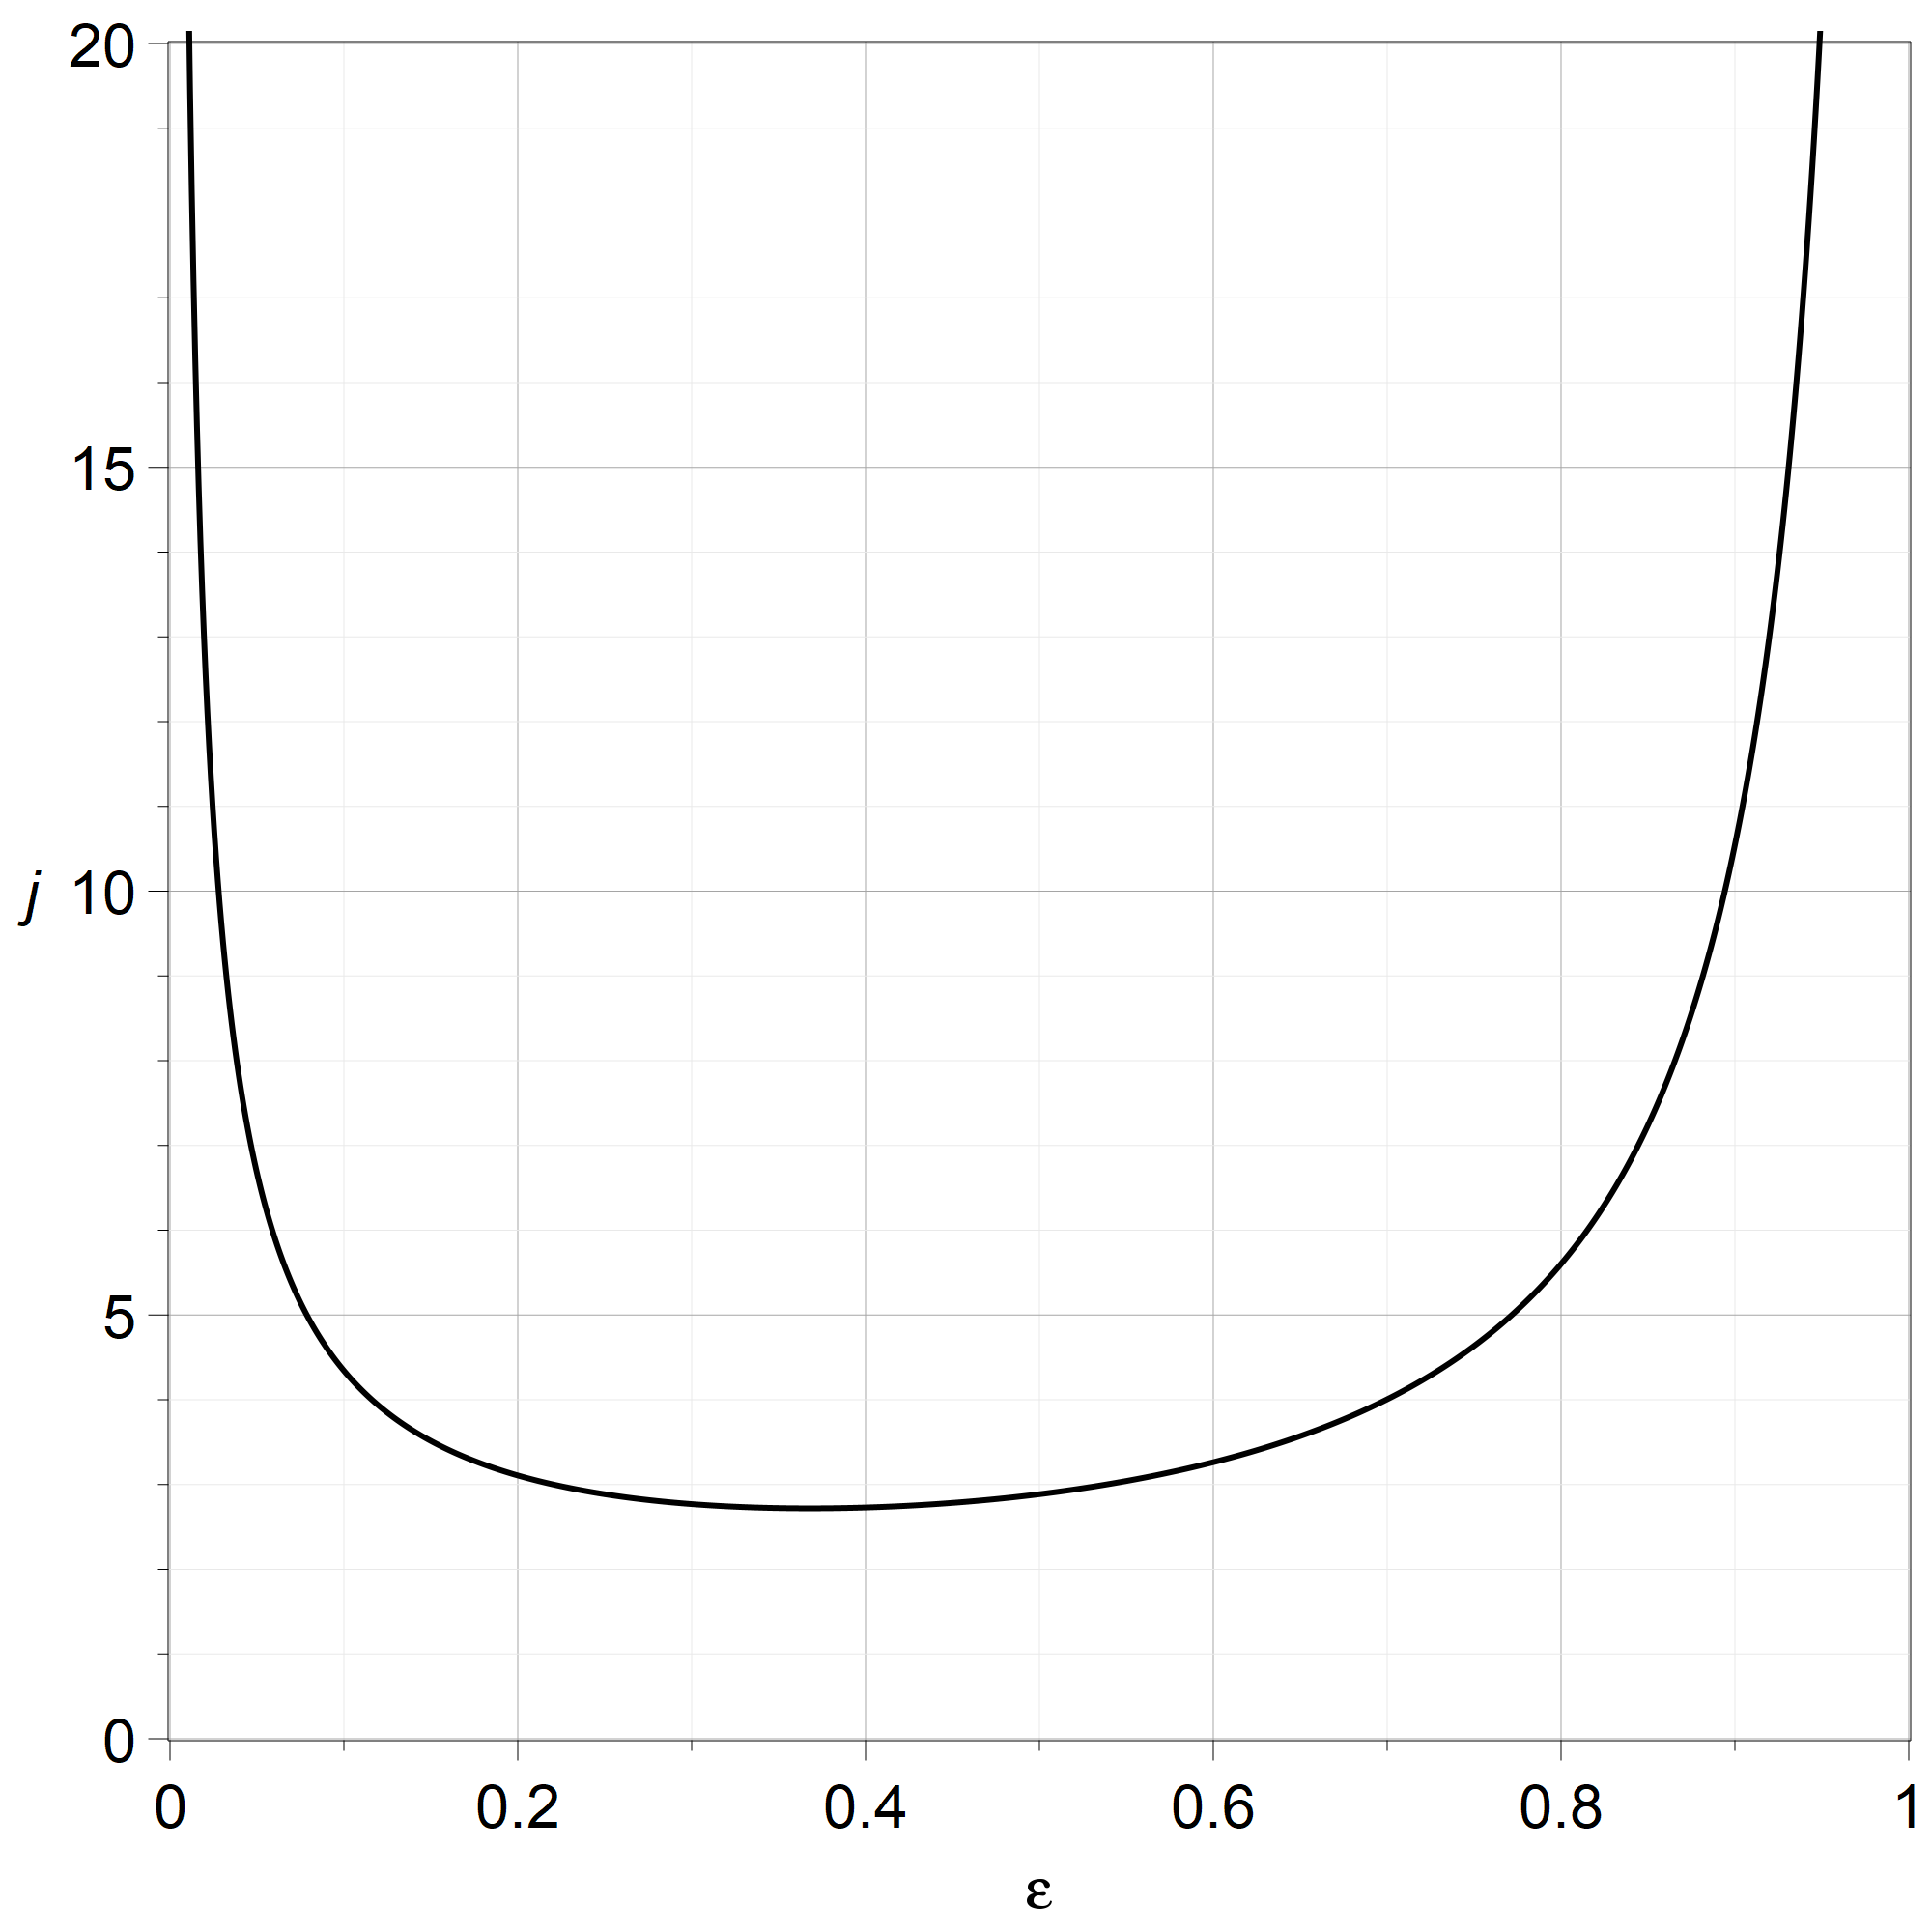

In [12]:
plot( -1/(e*ln(e)), e=0..1, view=[0..1, 0..20 ], thickness=6, font=["Arial",48], 
            labelfont=["Arial",48],size=[2000,2000], gridlines,
            labels=[e,j]);